# ひげキャッチbot

# Import

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.tseries.offsets as offsets
import gc
import seaborn
from datetime import datetime, timedelta


In [2]:
import json
import os

import eth_account
from eth_account.signers.local import LocalAccount

from hyperliquid.exchange import Exchange
from hyperliquid.info import Info

In [3]:
from hyperliquid.utils import constants

MARKET = "HYPE/USDC"
info = Info(base_url=constants.MAINNET_API_URL, skip_ws=True)

# Get current timestamp from epoch in milliseconds
current_timestamp = int(datetime.now().timestamp() * 1000)

# 200 minutes ago
start_timestamp = current_timestamp - 24 * 60 * 60 * 1000

# Get the user state and print out position information
df = pd.DataFrame()

# df = pd.DataFrame(candles)

# Loop through the candles and convert the timestamps to datetime objects
for i in range(7):
    print("%d day ago..." % i)
    candles = info.candles_snapshot(MARKET, '1m', start_timestamp, current_timestamp)
    df_tmp = pd.DataFrame(candles)
    df = pd.concat([df_tmp, df])
    current_timestamp = start_timestamp -1 
    start_timestamp = current_timestamp - 24 * 60 * 60 * 1000

# Rename columns
df = df.rename(columns={'t': "open-time", 'T': "close-time", "s": "market", "i": "frequency", "o": "open", "h": "high", "l": "low", "c": "close", "v": "volume", "n": "count"})
df = df.astype({'open-time': np.int64, 'open':np.float32, 'high':np.float32, 'low':np.float32, 'close':np.float32})
df['open-time'] =  pd.to_datetime(df['open-time'], utc=True, unit='ms')
df['close-time'] =  pd.to_datetime(df['close-time'], utc=True, unit='ms')

df.set_index('open-time', inplace=True)


0 day ago...
1 day ago...
2 day ago...
3 day ago...
4 day ago...
5 day ago...
6 day ago...


In [4]:
df

,close-time,market,frequency,open,close,high,low,volume,count
open-time,,,,,,,,,
2024-12-01 10:25:00+00:00,2024-12-01 10:25:59.999000+00:00,@107,1m,9.1484,9.2082,9.2100,9.1442,11095.89,206
2024-12-01 10:26:00+00:00,2024-12-01 10:26:59.999000+00:00,@107,1m,9.2082,9.2392,9.2400,9.1827,11088.05,244
2024-12-01 10:27:00+00:00,2024-12-01 10:27:59.999000+00:00,@107,1m,9.2387,9.2377,9.2400,9.1963,8102.46,255
2024-12-01 10:28:00+00:00,2024-12-01 10:28:59.999000+00:00,@107,1m,9.2377,9.2374,9.2400,9.2321,5176.71,216
2024-12-01 10:29:00+00:00,2024-12-01 10:29:59.999000+00:00,@107,1m,9.2375,9.2413,9.2417,9.2208,4769.38,231
...,...,...,...,...,...,...,...,...,...
2024-12-05 01:35:00+00:00,2024-12-05 01:35:59.999000+00:00,@107,1m,10.8800,10.8780,10.9000,10.8620,3902.19,246
2024-12-05 01:36:00+00:00,2024-12-05 01:36:59.999000+00:00,@107,1m,10.8790,10.7330,10.8840,10.6730,19486.0,356
2024-12-05 01:37:00+00:00,2024-12-05 01:37:59.999000+00:00,@107,1m,10.7240,10.7480,10.8230,10.7070,13792.18,334


<Axes: xlabel='open-time'>

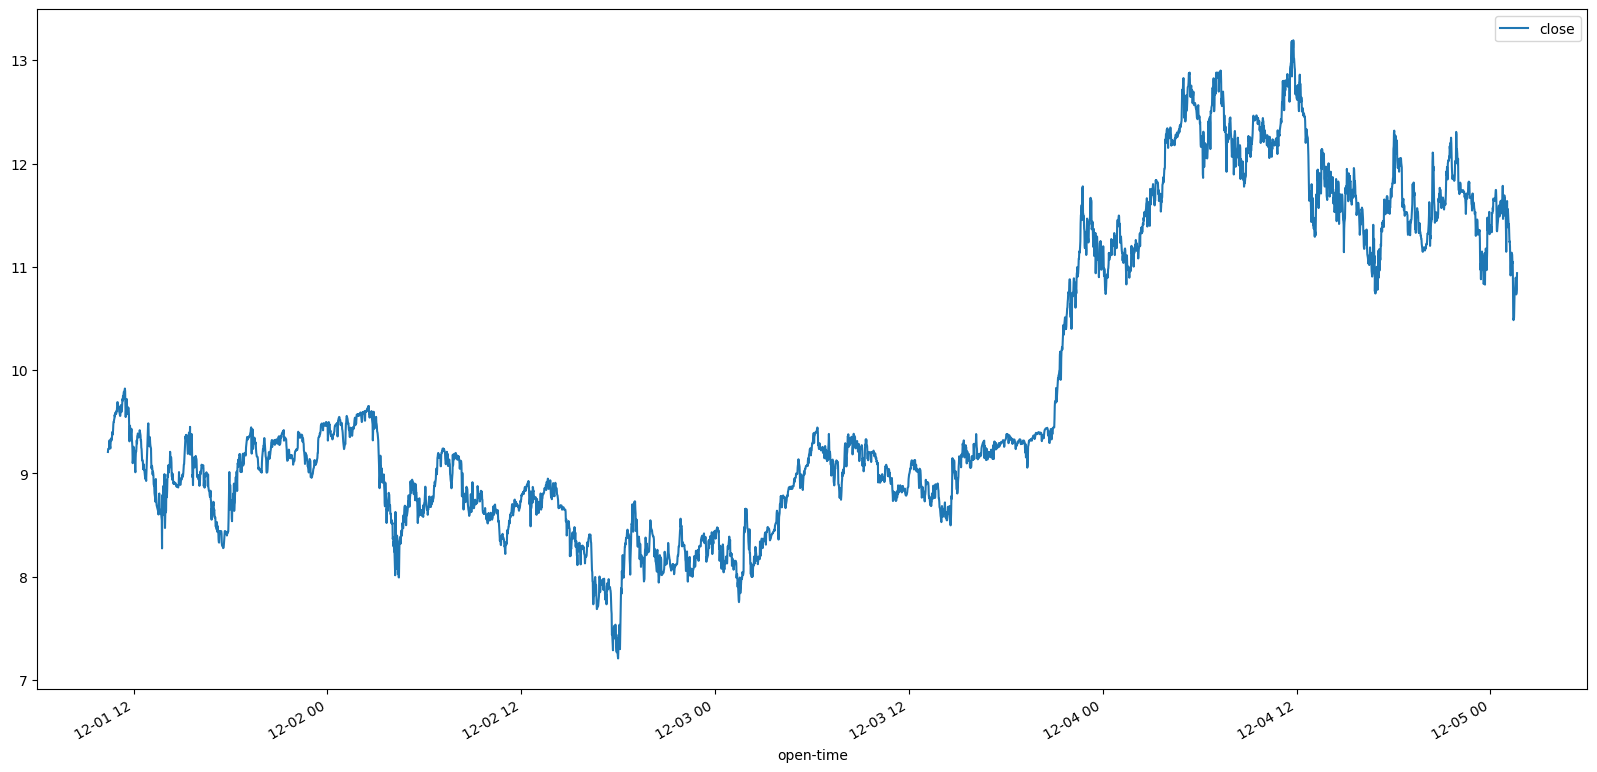

In [5]:
df.plot(y='close', figsize=(20, 10))

In [6]:
df

,close-time,market,frequency,open,close,high,low,volume,count
open-time,,,,,,,,,
2024-12-01 10:25:00+00:00,2024-12-01 10:25:59.999000+00:00,@107,1m,9.1484,9.2082,9.2100,9.1442,11095.89,206
2024-12-01 10:26:00+00:00,2024-12-01 10:26:59.999000+00:00,@107,1m,9.2082,9.2392,9.2400,9.1827,11088.05,244
2024-12-01 10:27:00+00:00,2024-12-01 10:27:59.999000+00:00,@107,1m,9.2387,9.2377,9.2400,9.1963,8102.46,255
2024-12-01 10:28:00+00:00,2024-12-01 10:28:59.999000+00:00,@107,1m,9.2377,9.2374,9.2400,9.2321,5176.71,216
2024-12-01 10:29:00+00:00,2024-12-01 10:29:59.999000+00:00,@107,1m,9.2375,9.2413,9.2417,9.2208,4769.38,231
...,...,...,...,...,...,...,...,...,...
2024-12-05 01:35:00+00:00,2024-12-05 01:35:59.999000+00:00,@107,1m,10.8800,10.8780,10.9000,10.8620,3902.19,246
2024-12-05 01:36:00+00:00,2024-12-05 01:36:59.999000+00:00,@107,1m,10.8790,10.7330,10.8840,10.6730,19486.0,356
2024-12-05 01:37:00+00:00,2024-12-05 01:37:59.999000+00:00,@107,1m,10.7240,10.7480,10.8230,10.7070,13792.18,334


In [7]:
# メモリ使用量をよく確認すること（分足くらいなら基本的に大したことはない）
# データ型に特に注意
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5238 entries, 2024-12-01 10:25:00+00:00 to 2024-12-05 01:39:00+00:00
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   close-time  5238 non-null   datetime64[ns, UTC]
 1   market      5238 non-null   object             
 2   frequency   5238 non-null   object             
 3   open        5238 non-null   float32            
 4   close       5238 non-null   float32            
 5   high        5238 non-null   float32            
 6   low         5238 non-null   float32            
 7   volume      5238 non-null   object             
 8   count       5238 non-null   int64              
dtypes: datetime64[ns, UTC](1), float32(4), int64(1), object(3)
memory usage: 1.1 MB


In [8]:
# Make sure all index is unique
df[df.index.duplicated()]

,close-time,market,frequency,open,close,high,low,volume,count
open-time,,,,,,,,,
2024-12-02 01:39:00+00:00,2024-12-02 01:39:59.999000+00:00,@107,1m,9.4300,9.4500,9.4500,9.4223,8391.3,157
2024-12-03 01:39:00+00:00,2024-12-03 01:39:59.999000+00:00,@107,1m,7.9891,7.9924,7.9934,7.9791,17917.0,196
2024-12-04 01:39:00+00:00,2024-12-04 01:39:59.999000+00:00,@107,1m,10.9160,10.8950,10.9170,10.8300,13340.7,219


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df[df.index.duplicated()]

,close-time,market,frequency,open,close,high,low,volume,count
open-time,,,,,,,,,


In [11]:
df.to_pickle('data-5m.pkl')

# 設定

In [12]:
# Parameters
MODE = "COMPOUND" # or "FIXED_LOT"
INITIAL_ASSET = 50000 # USD
FEE_RATE = 0.0003 # 0.03%
FUNDING_RATE = 0
# QUANTILE_HIGH = 0.99
# QUANTILE_LOW = 0.01
QUANTILE_HIGH = 0.95
QUANTILE_LOW = 0.05

# 全区間
TRADE_SINCE = "2024-11-01"

# 年末まで
TRADE_UNTIL = "2024-12-31"


### データ削減 （解析早くなる？）

In [13]:
df = df[TRADE_SINCE:TRADE_UNTIL].copy()

In [14]:
# Save df
df.to_pickle("data.pkl")

# 売り買いのシグナルを作成

In [15]:
# クローズをエントリポイントから作る場合
def cretate_buysells(rolling_size_buy, dip_buy, close_sell):
    global df
    # open-time以降は未来の情報なので、close='left'にして、現在の'open-time'以降のデータを集計に含めないようにしないといけない。
    df['rolled-high'] = df['high'].rolling(rolling_size_buy, closed='left').quantile(QUANTILE_HIGH)
    df['rolled-low'] = df['low'].rolling(rolling_size_buy, closed='left').quantile(QUANTILE_LOW)
    
    #df['rolled-sell-volume'] = df['taker-sell-volume'].rolling(rolling_size, closed='left').sum()
    #df['rolled-buy-volume'] = df['taker-buy-volume'].rolling(rolling_size, closed='left').sum()
    
    df['buy'] = df['rolled-high'] * dip_buy
    df['buy'] = df['buy'].round(2) # VERY IMPORTANT!!!!
    # df['sell'] =  df['rolled-low'] * dip_sell


    # OPEN時に指した値が HIGH/LOW にかかったらエントリ（かなりナイーブな処理）
    #
    # 元から無効な指値になることがあるので、そもそも指値がOpen価格より上か下か確認すること
    indexer_entry_b = (
        (df['low'] <= df['buy']) &
        (df['open'] > df['buy'])
    )
    
    # 売り側(close側)は、エントリポイントから作る
    df['sell'] = df['buy'] * close_sell
    df['sell'] = df['sell'].round(2) # VERY IMPORTANT!!!!

    # 買いでエントリする際のところだけ抽出する。
    # この計算だとかなり誤差があるのだが仕方ない。
    sells = df['sell'][indexer_entry_b]
    sells.name = 'sell'
    if 'sell' in df:
        df.drop(columns=['sell'], inplace=True)
    df = pd.concat([df, sells], axis=1)
    df['sell'] = df['sell'].ffill().fillna(0)
    
    indexer_entry_s = (
        (df['high']  >= df['sell']) &
        (df['open'] < df['sell'] )
    )
    indexer_entry_b.reindex(df.index).fillna(False)
    indexer_entry_s.reindex(df.index).fillna(False)
    
    # 高速化のため売り買いのポイントのみのデータを作る
    buys = df['buy'][indexer_entry_b]
    sells = -df['sell'][indexer_entry_s]
    buysells = pd.concat([buys, sells]).sort_index()
    return buysells

# 損益計算
ロングポジションでしかエントリーしないとする。

#### コードについて
セルをまたぐ参照なので、globalをつける必要がある。
新しく変数を追加した際に、globalの宣言を忘れがちなので注意

In [16]:
def open_position(index, price, verbose=False):
    global trade_count
    global win_count
    global position_coin
    global open_price
    global asset
    global entry_fee
    global last_entry_time
    global last_order_size
    global entry_point_s
    global oepn_price_s
    global position_coin_s

    absprice = abs(price)
    entry_point_s.at[index] = price

    last_entry_time = index
    if MODE == "FIXED_LOT":
        order_size = int(LOT / price)
        fee = LOT * FEE_RATE
    else:
        order_size = int(asset / price * LEVERAGE) # SOL contract min size is 1. (TODO: Make it flexible to support unit)
        fee = asset * FEE_RATE * LEVERAGE # TODO: Not very accurate
    
    # Just record fee and count it when position is closed.
    entry_fee = fee
    open_price = price
    open_price_s.at[index] = open_price
    d = df.loc[index]
    if verbose:
        print(
            "%s, %.1f, BUY, Order Size: %d,  Order Price: %.2f, Open: %.2f, High: %.2f, Low: %.2f, Close: %.2f, Recent High:%.2f, Recent Low: %.2f" %
            (
                index,
                asset,
                order_size,
                price,
                d['open'],
                d['high'],
                d['low'],
                d['close'],
                d['rolled-high'],
                d['rolled-low']
            ) 
        )
    last_order_size = order_size
    position_coin += order_size
    position_coin_s.at[index] = position_coin                


In [17]:
def close_position(index, price, verbose=False):
    global trade_count
    global win_count
    global normal_close_count
    global position_coin
    global open_price
    global asset
    global entry_fee
    global last_entry_time
    global last_order_size
    global fee_s
    global pnl_s
    global asset_s
    global position_duration_s
    global open_price_s
    global close_point_s
    global position_coin_s

    absprice = abs(price)

    order_size = -position_coin
    fee =  abs(order_size) * (absprice) * FEE_RATE
    duration_hours  = (index - last_entry_time) / np.timedelta64(1, 'h')
    funding_fee = abs(order_size) * (absprice) * FUNDING_RATE * duration_hours
    fee += funding_fee
    fee += entry_fee
    fee_s.at[index] = fee
    pnl = abs(order_size) * (absprice - open_price) - fee
    pnl_s.at[index] = pnl
    pnl_ratio = pnl / asset # Percent change from asset at entry
    pnl_ratio_s.at[index] = pnl_ratio
    asset += pnl
    asset_s.at[index] = asset
    d = df.loc[index]
    trade_count += 1
    win_count += 1 if pnl > 0 else 0
    position_duration_s.at[index] = index - last_entry_time
    if verbose:
        print(
            "%s, %.1f, SELL, Order Size: %d, Order Price: %.2f, Order Open Price: %.2f, PnL: %.1f (%.3f %%), Open: %.2f, High: %.2f, Low: %.2f, Close: %.2f, Recent High:%.2f, Recent Low: %.2f" %
            (
                index,
                asset,
                order_size,
                price,
                open_price,
                pnl,
                pnl_ratio*100,
                d['open'],
                d['high'],
                d['low'],
                d['close'],
                d['rolled-high'],
                d['rolled-low']
            ) 
        )
    close_point_s.at[index] = absprice
    open_price = -1
    open_price_s.at[index] = open_price
    last_order_size = order_size
    position_coin += order_size
    position_coin_s.at[index] = position_coin        


In [18]:
def simulate_pnl(buysells, verbose=False):
    global df
    global position_coin
    global position_coin_s
    global open_price
    global open_price_s
    global entry_point_s
    global close_point_s
    global pnl_s
    global pnl_ratio_s
    global asset
    global asset_s
    global fee_s
    global position_duration_s
    global trade_count
    global win_count
    global normal_close_count
    global entry_fee
    global last_entry_time
    global last_order_size
    
    # Simulate PnL
    position_coin = 0
    position_coin_s = pd.Series(dtype='float64', name='position_coin')
    position_coin_s.at[df.index[0]] = position_coin

    open_price = -1
    open_price_s = pd.Series(dtype='float64', name='open_price')
    open_price_s.at[df.index[0]] = open_price

    entry_point_s = pd.Series(dtype='float64', name='open_price')
    close_point_s = pd.Series(dtype='float64', name='open_price')

    pnl_s = pd.Series(dtype='float64', name='pnl')
    pnl_s.at[df.index[0]] = 0

    pnl_ratio_s = pd.Series(dtype='float64', name='pnl_percent')
    pnl_ratio_s.at[df.index[0]] = 0

    asset = INITIAL_ASSET
    asset_s = pd.Series(dtype='float64', name='asset')
    asset_s.at[df.index[0]] = asset

    fee_s = pd.Series(dtype='float64', name='fee')
    fee_s.at[df.index[0]] = 0

    position_duration_s = pd.Series(dtype='timedelta64[ns]', name='position-duration')

    trade_count = 0
    win_count = 0
    normal_close_count = 0
    
    entry_fee = 0
    last_entry_time = 0
    last_order_size = 0

    for index, price in buysells.items():
        if (position_coin > 0 and index - last_entry_time > MAX_POSITION_DURATION):
            #  ポジション保持期間が長すぎる場合はもうすでにクローズしていたということにする。
            # print("Max duration exeedes. Close position.")
            ix = last_entry_time + MAX_POSITION_DURATION
            close_position(ix, df.loc[ix]['open'], verbose=verbose)            

        if index < pd.Timestamp(TRADE_SINCE, tz='utc'):
            continue
        if index > pd.Timestamp(TRADE_UNTIL, tz='utc'):
            continue

        # ロングしかしないようにする。同方向への連続取引回数を制限
        # 単純化のため、複数ロットでのエントリーは行わない。
        if position_coin == 0 and price < 0:
            continue
        if position_coin > 0 and price > 0:
            continue

        if price > 0:
            open_position(index, price, verbose=verbose)
        else:
            normal_close_count += 1
            close_position(index, price, verbose=verbose)

    # 最後にポジションをクローズする
    if position_coin > 0:
        if df.index[-1] - last_entry_time > MAX_POSITION_DURATION:
            #  保持期間が長すぎた場合は一定区間でクローズしていたとする。
            # print("Max duration exeedes. Close position.")
            ix = last_entry_time + MAX_POSITION_DURATION
            close_position(ix, df.loc[ix]['open'], verbose=verbose)
        else:
            normal_close_count += 1
            ix = df.index[-1]
            close_position(ix, df.loc[ix]['open'], verbose=verbose)

    pnl_percent_s = ((asset_s - INITIAL_ASSET) / INITIAL_ASSET * 100)
    pnl_percent_s.name = 'pnl_percent'
    
    #
    # 各種データを整備
    #
    if 'position_coin' in df:
        df.drop(columns=['position_coin'], inplace=True)
    df = pd.concat([df, position_coin_s], axis=1)
    df['position_coin'] = df['position_coin'].ffill().fillna(0)

    if 'open_price' in df:
        df.drop(columns=['open_price'], inplace=True)
    df = pd.concat([df, open_price_s], axis=1)
    df['open_price'] = df['open_price'].ffill().fillna(-1)

    if 'pnl' in df:
        df.drop(columns=['pnl'], inplace=True)
    df = pd.concat([df, pnl_s], axis=1)
    df['pnl'] = df['pnl'].fillna(0)

    if 'pnl_percent' in df:
        df.drop(columns=['pnl_percent'], inplace=True)
    df = pd.concat([df, pnl_percent_s], axis=1)
    df['pnl_percent'] = df['pnl_percent'].ffill().fillna(1)

    if 'fee' in df:
        df.drop(columns=['fee'], inplace=True)
    df = pd.concat([df, fee_s], axis=1)
    df['fee'] = df['fee'].fillna(0)

    if 'asset' in df:
        df.drop(columns=['asset'], inplace=True)
    df = pd.concat([df, asset_s], axis=1)
    df['asset'] = df['asset'].ffill()

    # ドローダウンを見たいので必ずLOWを使うこと（更に余裕をみて、バッファをつけたほうがいい）
    df['net-asset'] = df['asset'] + df['position_coin'] * (df['low'] - df['open_price'])
    df['net-asset'] = df['net-asset'].ffill()

    # きちんとドローダウンを見たいので必ずLOWを使うこと（
    df['drawdown'] = df['position_coin'] * (df['low'] - df['open_price']) / df['asset']

    # きちんとドローダウンを見たいので必ずLOWを使うこと（更に余裕をみて、バッファをつけたほうがいい）
    df['drawdown_percent'] = df['position_coin'] * (df['low'] - df['open_price']) / df['asset'] * 100    

    return df['pnl_percent'].iloc[-1], df['drawdown_percent'].min(), trade_count

In [19]:
pnl_array = []

for rolling_size_buy in [10, 20, 40, 100, 200]:
    global LEVERAGE
    global MAX_POSITION_DURATION
    LEVERAGE = 1
    print("Rolling Size: %d" % rolling_size_buy)
    for position_duration in [1, 2, 4, 6, 8, 12, 16, 24]:
        MAX_POSITION_DURATION = pd.Timedelta(position_duration, "h")

        for dip_buy in range(90, 99, 1):
            dip_buy = dip_buy * 0.01
    
            for dip_sell in range(101, 110, 1):
                dip_sell = dip_sell * 0.01
                buysells = cretate_buysells(rolling_size_buy, dip_buy, dip_sell)
                pnl, drawdown, tradecount = simulate_pnl(buysells)
                pnl_array.append({
                    'pnl': pnl,
                    'drawdown': drawdown,
                    'rolling-size': rolling_size_buy,
                    'position-duration': position_duration,
                    'dip-buy': dip_buy,
                    'dip-sell': dip_sell,
                    'tradecount': tradecount
                })

Rolling Size: 10
Rolling Size: 20
Rolling Size: 40
Rolling Size: 100
Rolling Size: 200


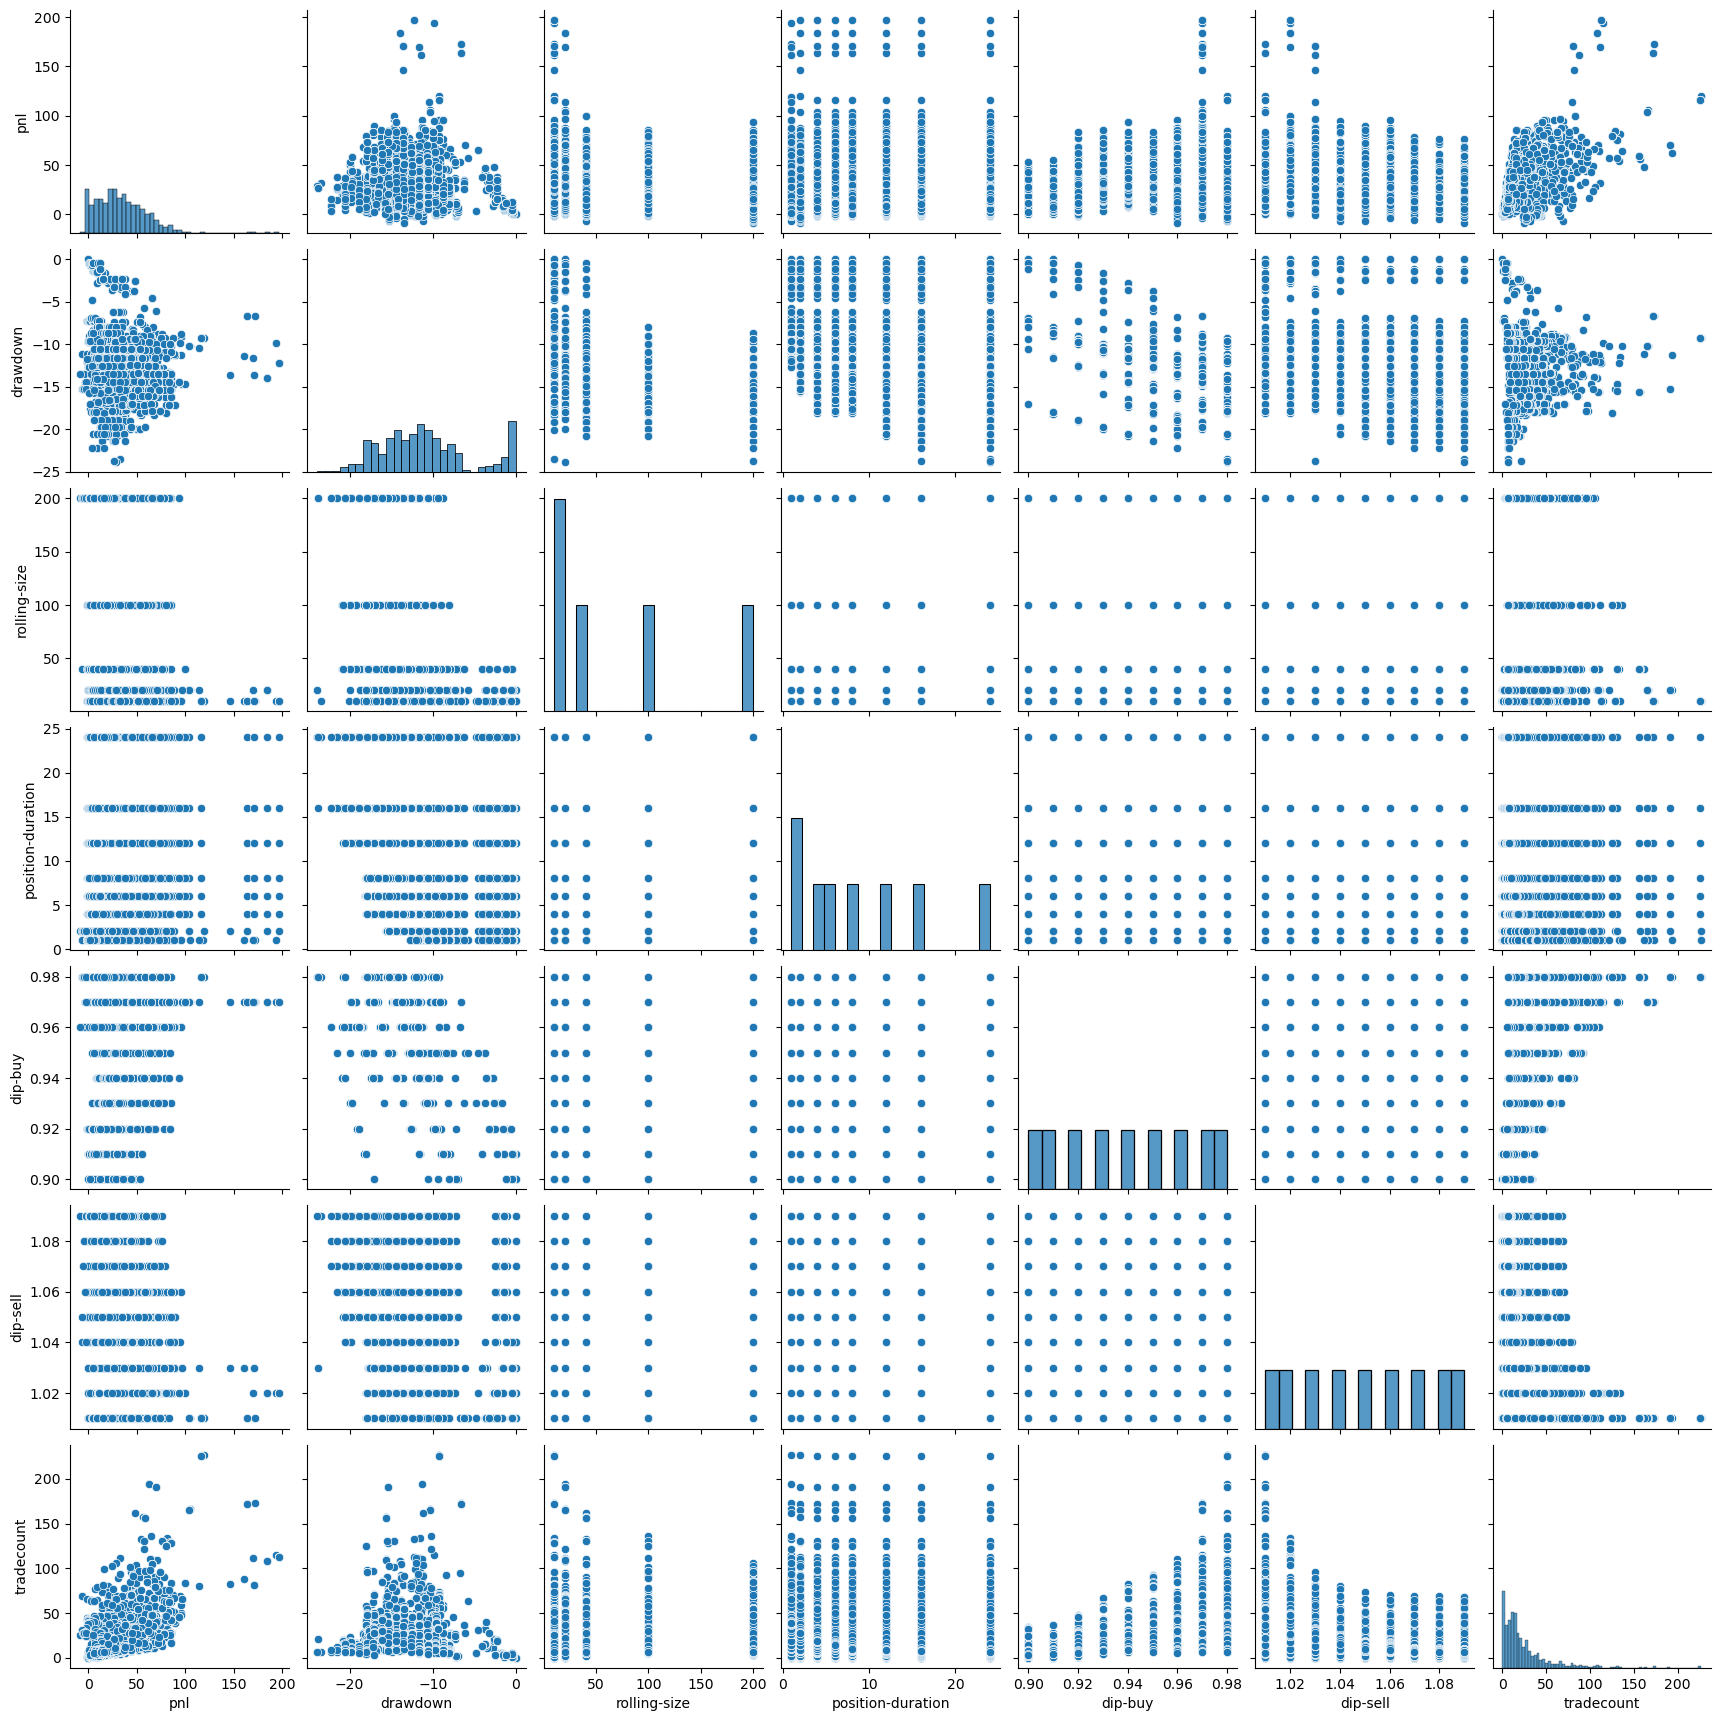

In [20]:
df_pnl = pd.DataFrame(pnl_array)

seaborn.pairplot(df_pnl)

In [44]:

pd.set_option('display.max_rows', None)

In [45]:
df_pnl.sort_values('pnl', ascending=False)



,pnl,drawdown,rolling-size,position-duration,dip-buy,dip-sell,tradecount
631,196.938983,-12.206513,10,24,0.97,1.02,113
145,196.938983,-12.206513,10,2,0.97,1.02,113
388,196.938983,-12.206513,10,8,0.97,1.02,113
307,196.938983,-12.206513,10,6,0.97,1.02,113
226,196.938983,-12.206513,10,4,0.97,1.02,113
550,196.938983,-12.206513,10,16,0.97,1.02,113
469,196.938983,-12.206513,10,12,0.97,1.02,113
64,193.620850,-9.859114,10,1,0.97,1.02,115
1117,184.257752,-13.962059,20,12,0.97,1.02,108
874,184.257752,-13.962059,20,4,0.97,1.02,108


# パラメータ解析
* 区間を長くとると、一度目の下落で利確した後にまたすぐに次の取引に入ってしまったりする。
* 利確幅を長く取りすぎて、Normal closeできずに利益が出た場合は単にロング相場で助かっただけなので、そこはきちんと見るべき
* 基本的に、Normal close が多く、エントリ回数もそれなりにあるものを目指すべき

In [61]:
LEVERAGE = 1
MAX_POSITION_DURATION = pd.Timedelta(2, "h")

# buysells = cretate_buysells(500, 0.90, 1.07)
# buysells = cretate_buysells(800, 0.84, 1.23)
buysells = cretate_buysells(30, 0.965, 1.025)

pnl, drawdown, tradecount = simulate_pnl(buysells, verbose=True)

2024-12-01 11:32:00+00:00, 50000.0, BUY, Order Size: 5274,  Order Price: 9.48, Open: 9.52, High: 9.61, Low: 9.47, Close: 9.60, Recent High:9.83, Recent Low: 9.54
2024-12-01 11:35:00+00:00, 51235.4, SELL, Order Size: -5274, Order Price: -9.72, Order Open Price: 9.48, PnL: 1235.4 (2.471 %), Open: 9.64, High: 9.78, Low: 9.62, Close: 9.72, Recent High:9.83, Recent Low: 9.51
2024-12-01 11:44:00+00:00, 51235.4, BUY, Order Size: 5404,  Order Price: 9.48, Open: 9.57, High: 9.57, Low: 9.39, Close: 9.43, Recent High:9.83, Recent Low: 9.51
2024-12-01 12:53:00+00:00, 50340.3, SELL, Order Size: -5404, Order Price: -9.32, Order Open Price: 9.48, PnL: -895.1 (-1.747 %), Open: 9.31, High: 9.40, Low: 9.30, Close: 9.40, Recent High:9.41, Recent Low: 8.92
2024-12-01 13:06:00+00:00, 50340.3, BUY, Order Size: 5495,  Order Price: 9.16, Open: 9.24, High: 9.24, Low: 9.10, Close: 9.10, Recent High:9.50, Recent Low: 8.92
2024-12-01 13:51:00+00:00, 48717.0, SELL, Order Size: -5495, Order Price: -8.87, Order Open

In [62]:
pnl, drawdown

(123.19035111632436, -13.955270135573508)

In [63]:
pnl_percent_s = ((asset_s - INITIAL_ASSET) / INITIAL_ASSET * 100)
pnl_percent_s.name = 'pnl_percent'

<Axes: >

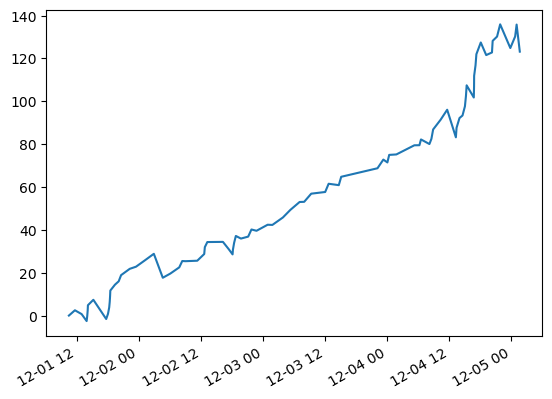

In [64]:
pnl_percent_s.plot() 

<Axes: >

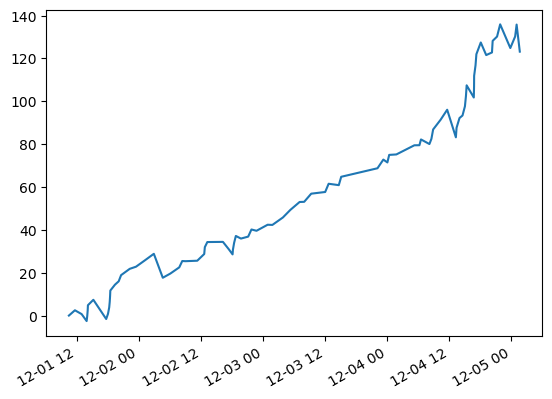

In [65]:
pnl_percent_s.plot() 

<Axes: >

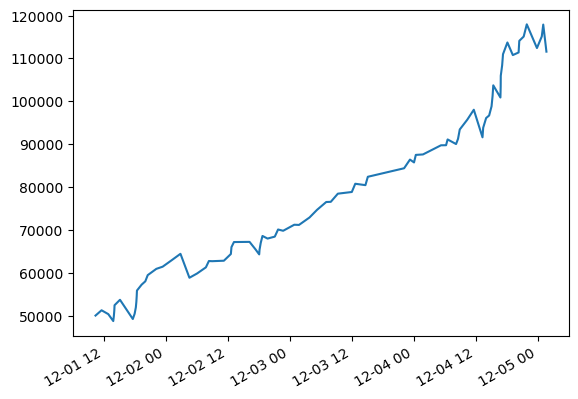

In [66]:
asset_s.plot() 

<Axes: >

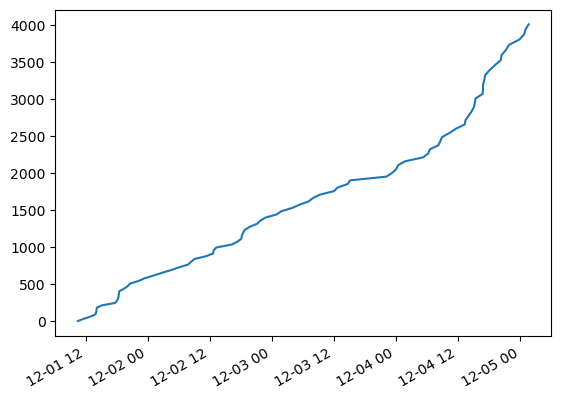

In [67]:
fee_s.cumsum().plot()

In [68]:
trade_count

85

In [69]:
normal_close_count / trade_count

0.9882352941176471

In [70]:
win_count / trade_count

0.788235294117647

### 0 番目には、かならず0が入っているので除外する

In [71]:
pnl_ratio_s[1:].describe()

count    85.000000
mean      0.009799
std       0.024688
min      -0.086778
25%       0.001201
50%       0.023995
75%       0.024561
max       0.029481
Name: pnl_percent, dtype: float64

* 売り値の計算が適当なので、どうしてもズレるところがある。
（エントリしたところから、さらに下落してその時点の買い値が下がった際に、売り値も同時に下がってしまう）

<Axes: >

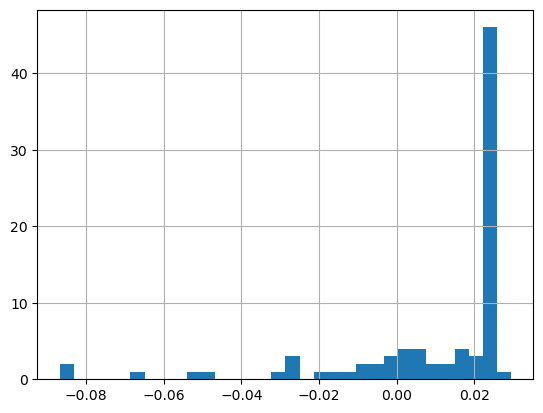

In [72]:
pnl_ratio_s[1:].hist(bins=32)

In [51]:
position_duration_s

2024-12-01 12:51:00+00:00   0 days 01:07:00
2024-12-01 13:36:00+00:00   0 days 00:30:00
2024-12-01 13:48:00+00:00   0 days 00:10:00
2024-12-01 13:51:00+00:00   0 days 00:02:00
2024-12-01 13:58:00+00:00   0 days 00:02:00
                                  ...      
2024-12-04 23:49:00+00:00   0 days 01:48:00
2024-12-05 00:30:00+00:00   0 days 00:05:00
2024-12-05 01:02:00+00:00   0 days 00:03:00
2024-12-05 01:03:00+00:00   0 days 00:00:00
2024-12-05 01:39:00+00:00   0 days 00:29:00
Name: position-duration, Length: 69, dtype: timedelta64[ns]

In [52]:
position_duration_s.describe()

count                           69
mean               0 days 00:28:00
std      0 days 00:35:09.783930949
min                0 days 00:00:00
25%                0 days 00:02:00
50%                0 days 00:10:00
75%                0 days 00:40:00
max                0 days 02:00:00
Name: position-duration, dtype: object

In [53]:
# 最大のドローダウン
df['drawdown_percent'].min()

-13.48967925702675

# 動作をビジュアルで確認

In [54]:
def plot_range(start, end, plot_drawdown=False):
    fig, ax = plt.subplots(figsize=(20,15))
#    ax.plot(df['net-asset'][start:end], color='red', label='Net Asset')
#    ax.plot(df['asset'][start:end], color='green', label='Asset')
    if plot_drawdown:
        ax.plot(df['drawdown_percent'][start:end], color='red', label='Unrealized Pnl % (drawdown)')
    else:
        ax.plot(df['pnl_percent'][start:end], color='green', label='Realized PnL %')

    ax.legend(loc='upper left', fontsize=20)
    ax2 = ax.twinx()
    ax2.plot(entry_point_s[start:end], 'bs', label='Entry')
    ax2.plot(close_point_s[start:end], 'rs', label='close')

    ax2.plot(df['low'][start:end], alpha=0.4, label='1m low')
    ax2.plot(df['high'][start:end], alpha=0.4, label='1m high')
    ax2.plot(df['rolled-low'][start:end], alpha=0.4, label='recent low')
    ax2.plot(df['rolled-high'][start:end], alpha=0.4, label='recent high')

    ax2.legend(loc='lower right', fontsize=20)

# Plot

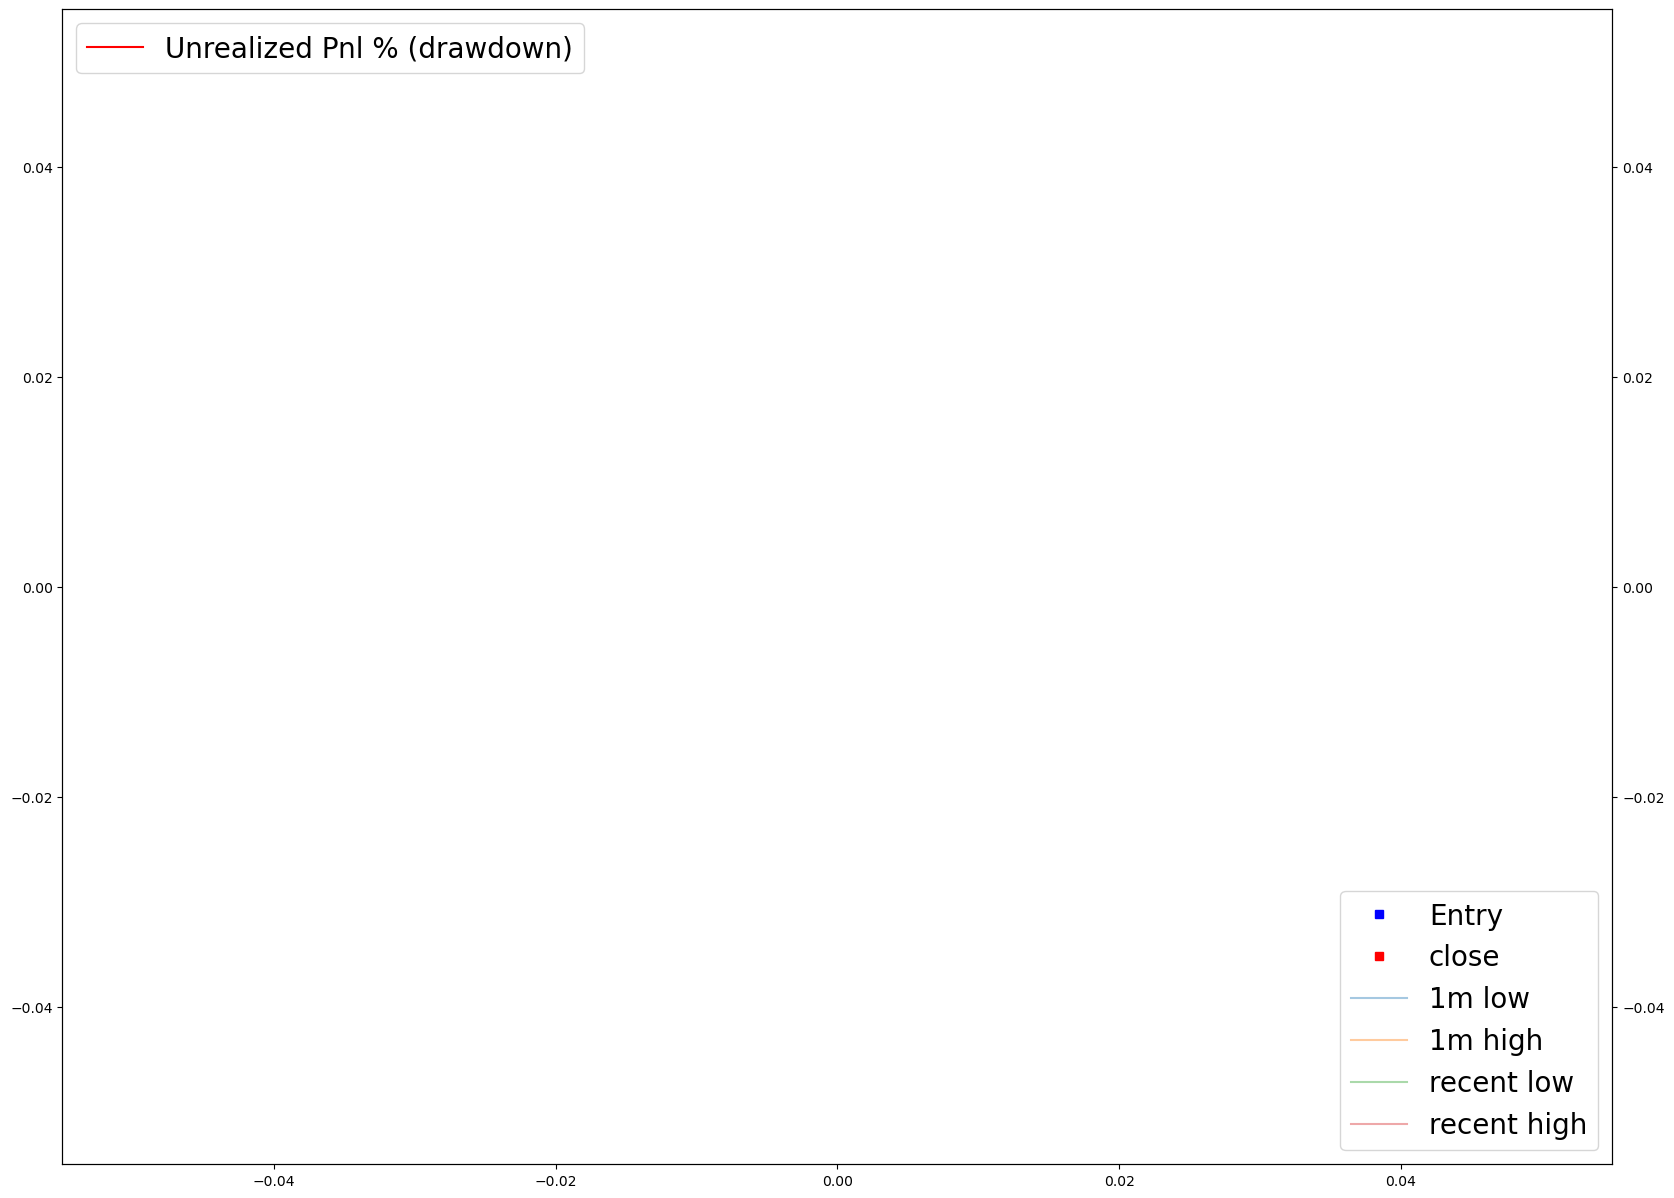

In [55]:
year = 2024
for month in range(11, 12):
    plot_range('%d-%02d' % (year, month), '%d-%02d' % (year, month), plot_drawdown=True)

# 全区間確認

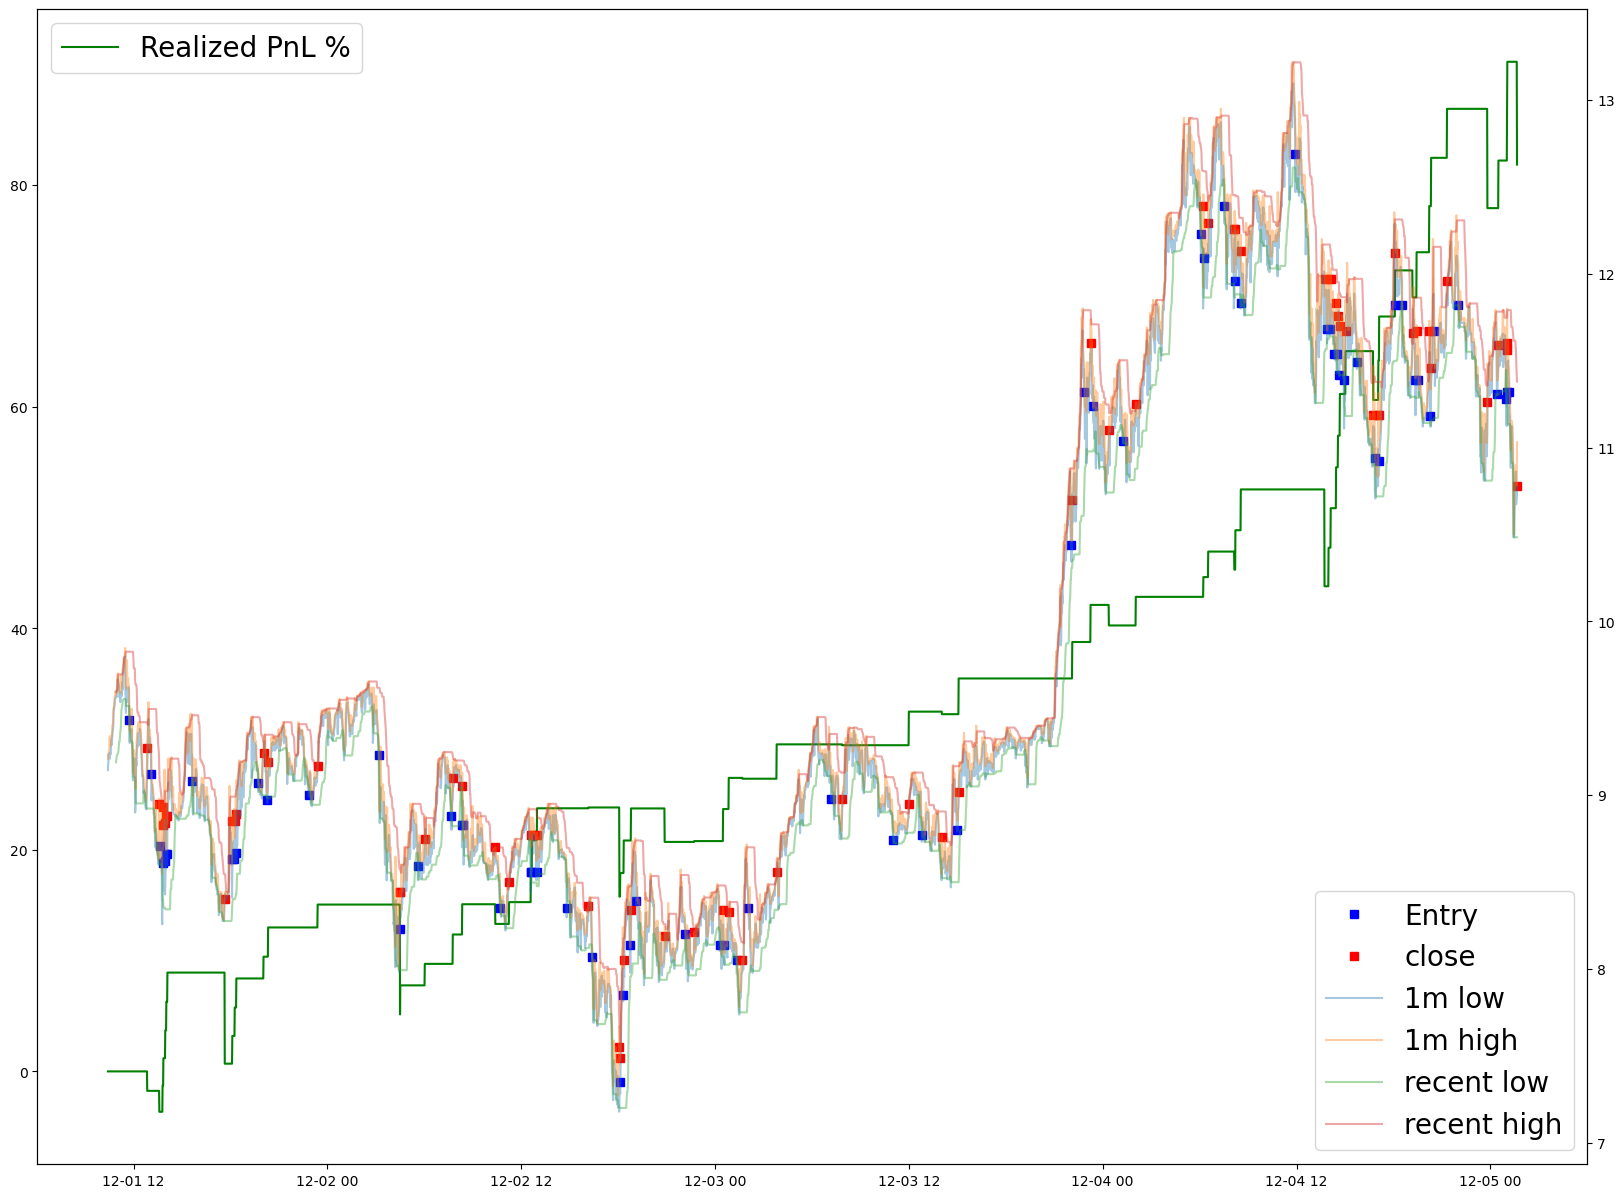

In [56]:
plot_range(TRADE_SINCE, TRADE_UNTIL)

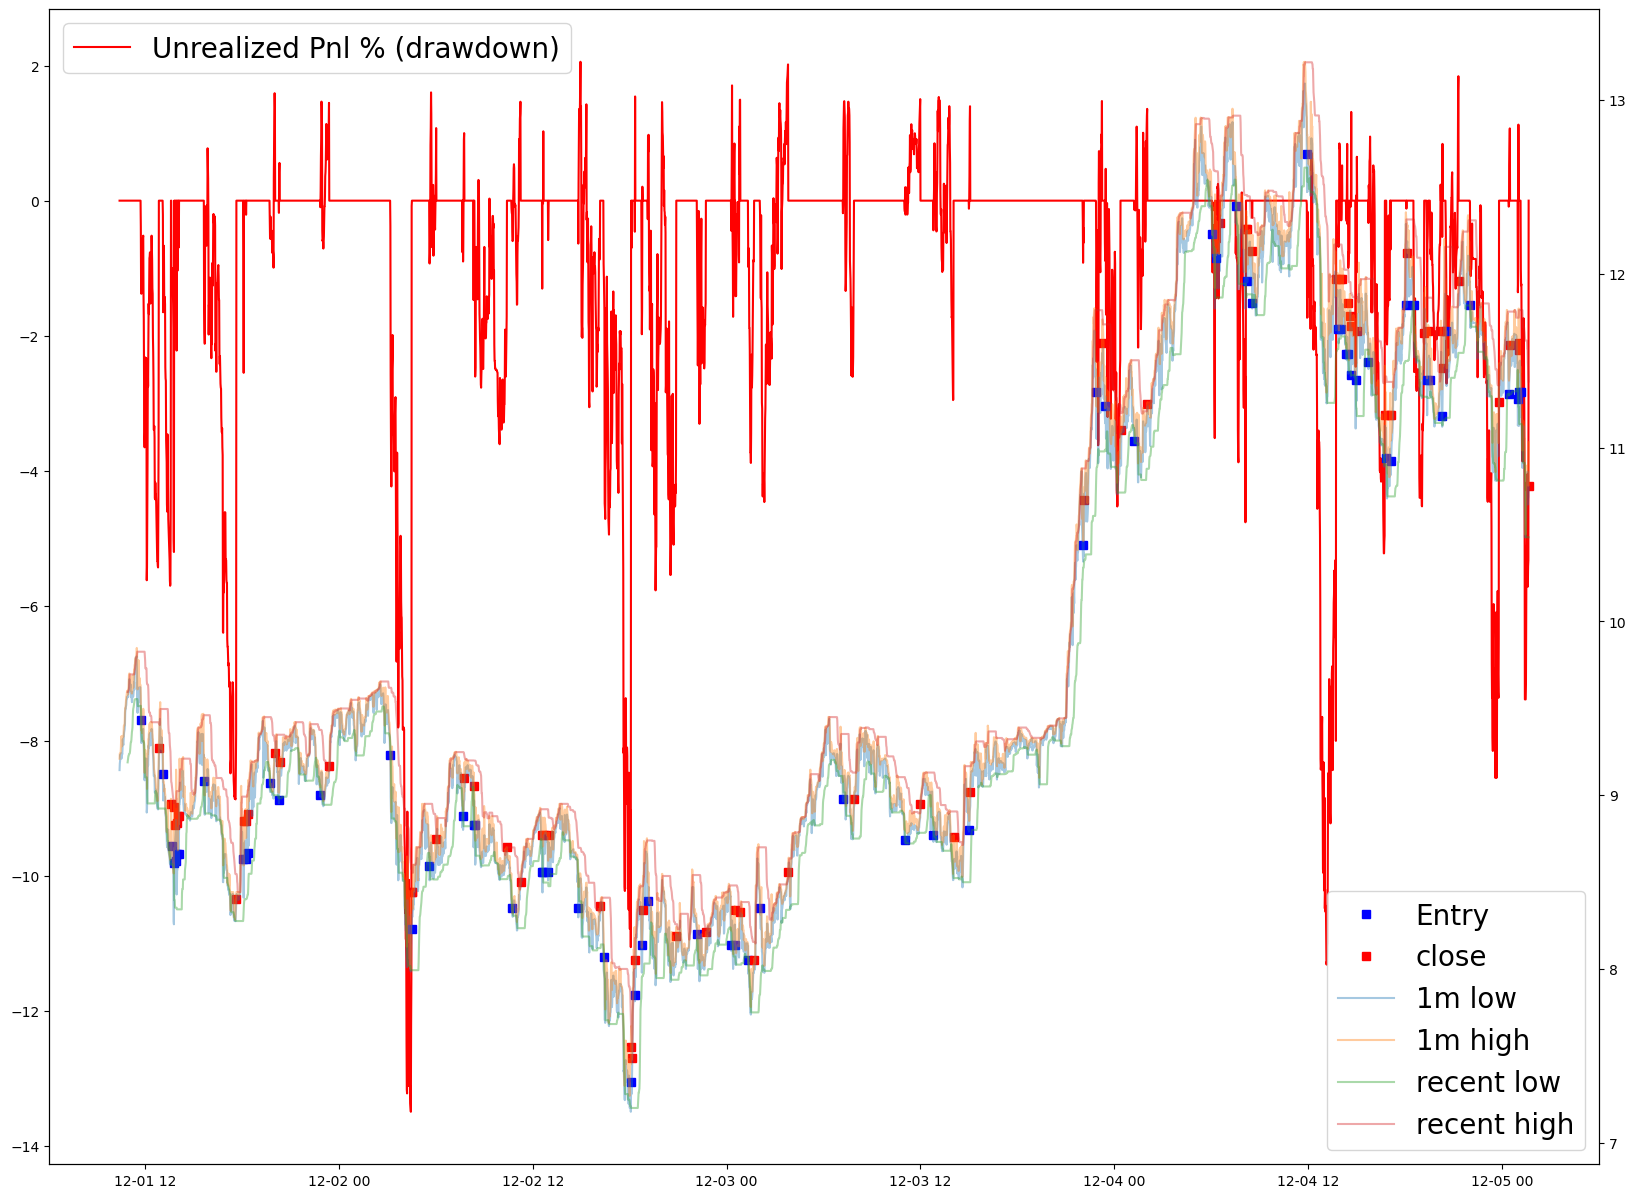

In [57]:
plot_range(TRADE_SINCE, TRADE_UNTIL, plot_drawdown=True)

# 各種プロット

In [ ]:
def plot_fee(start, end):
    # Fee and asset
    fig, ax = plt.subplots(figsize=(20,15))
    ax.plot(asset_s[start:end], ds='steps-post', color='red', label='Asset')
    ax.plot(fee_s[start:end].cumsum(), ds='steps-post', color='green', label='Total Fee')
    ax.legend(loc='upper left', fontsize=20)
    ax2 = ax.twinx()
    ax2.plot(df['open'][start:end], label='asset price')
    ax2.legend(loc='upper right', fontsize=20)

In [ ]:
plot_fee(TRADE_SINCE, TRADE_UNTIL)

In [ ]:
def plot_position(start, end):
    fig, ax = plt.subplots(figsize=(20,15))
    ax.plot(position_coin_s[start:end], ds='steps-post', color='red', label='Position')
    ax.legend(loc='upper left', fontsize=20)
    ax2 = ax.twinx()
    ax2.plot(df['open'][start:end], label='asset price')
    ax2.legend(loc='upper right', fontsize=20)

In [ ]:
plot_position(TRADE_SINCE, TRADE_UNTIL)

In [ ]:
def plot_equity(start, end):
    fig, ax = plt.subplots(figsize=(20,15))
    ax.plot(df['net-asset'][start:end], color='red', label='Net Asset')
    ax.plot(df['asset'][start:end], color='green', label='Asset')
    
    ax.legend(loc='upper left', fontsize=20)
    ax2 = ax.twinx()
    ax2.plot(df['open'][start:end], label='asset price')
    ax2.legend(loc='upper right', fontsize=20)

In [ ]:
plot_equity(TRADE_SINCE, TRADE_UNTIL)

In [ ]:
def plot_drawdown(start, end):
    # Drawdown
    fig, ax = plt.subplots(figsize=(20,15))
    ax.plot(df['drawdown'][start:end]*100, color='red', label='Drawdown %')
    ax.legend(loc='upper left', fontsize=20)
    ax2 = ax.twinx()
    ax2.plot(df['open'][start:end], label='asset price')
    ax2.legend(loc='upper right', fontsize=20)

In [ ]:
plot_drawdown(TRADE_SINCE, TRADE_UNTIL)